## **Image classification with neural networks**

**Group Members:**

Advaith Shankar (Eid: as235592)

Manasa Maganti (Eid: mm226524)

Shashank Rao (Eid: sr55952)

Varsha Manju Jayakumar (Eid: vm26476)

**Note:** This notebook consists of only the problem "Image Classification with Neural Networks". The remaining problems are uploaded as a separate notebook on the github repo

In this problem, you will train a neural network to classify satellite images. In the data/EuroSAT_RGB directory, you will find 11 subdirectories, each corresponding to a different class of land or land use: e.g. industrial, crops, rivers, forest, etc. Within each subdirectory, you will find examples in .jpg format of each type. (Thus the name of the directory in which the image lives is the class label.)

Your job is to set up a neural network that can classify the images as accurately as possible. Use an 80/20 train test split. Summarize your model and its accuracy in any way you see fit, but make you include at a minimum the following elements:

overall test-set accuracy, measured however you think is appropriate
show some of the example images from the test set, together with your model's predicted classes.
a confusion matrix showing the performance of the model on the set test, i.e. a table that cross-tabulates each test set example by (actual class, predicted class).
I strongly recommend the use of PyTorch in a Jupyter notebook for this problem; look into PyTorch's ImageFolder data set class, which will streamline things considerably.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving EuroSAT_RGB.zip to EuroSAT_RGB.zip


In [12]:
!unzip EuroSAT_RGB.zip


Archive:  EuroSAT_RGB.zip
replace EuroSAT_RGB/AnnualCrop/AnnualCrop_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
!pip install split-folders
import splitfolders

splitfolders.ratio('EuroSAT_RGB', output="output", seed=1337, ratio=(.8, 0.2))

Copying files: 27000 files [00:06, 4108.65 files/s]


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to your data
train_dir = '/content/output/train'
test_dir = '/content/output/val'



In [5]:
# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80/20 split
)

test_datagen = ImageDataGenerator(rescale=1./255)



In [6]:
# Load and prepare data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),  # Adjust as needed
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)



Found 17280 images belonging to 10 classes.
Found 4320 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.


In [7]:
# Define your model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10 output classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # Adjust as needed
    validation_data=validation_generator
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print('Test accuracy:', test_accuracy)

# Summarize the model
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


540/540 ━━━━━━━━━━━━━━━━━━━━ 175s 314ms/step - accuracy: 0.3778 - loss: 1.5839 - val_accuracy: 0.6208 - val_loss: 0.9890
Epoch 2/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 176s 267ms/step - accuracy: 0.6748 - loss: 0.9112 - val_accuracy: 0.7407 - val_loss: 0.7209
Epoch 3/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 151s 278ms/step - accuracy: 0.7363 - loss: 0.7312 - val_accuracy: 0.7799 - val_loss: 0.6110
Epoch 4/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 206s 285ms/step - accuracy: 0.7739 - loss: 0.6328 - val_accuracy: 0.7727 - val_loss: 0.6510
Epoch 5/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 145s 267ms/step - accuracy: 0.7862 - loss: 0.6019 - val_accuracy: 0.8164 - val_loss: 0.5314
Epoch 6/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 204s 270ms/step - accuracy: 0.8031 - loss: 0.5556 - val_accuracy: 0.7884 - val_loss: 0.5919
Epoch 7/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 149s 275ms/step - accuracy: 0.8146 - loss: 0.5222 - val_accuracy: 0.7725 - val_loss: 0.6355
Epoch 8/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 201s 273ms/step - accuracy: 0.8244 - loss: 0.49

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,879,328 (18.61 MB)

 Trainable params: 1,626,442 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,252,886 (12.41 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


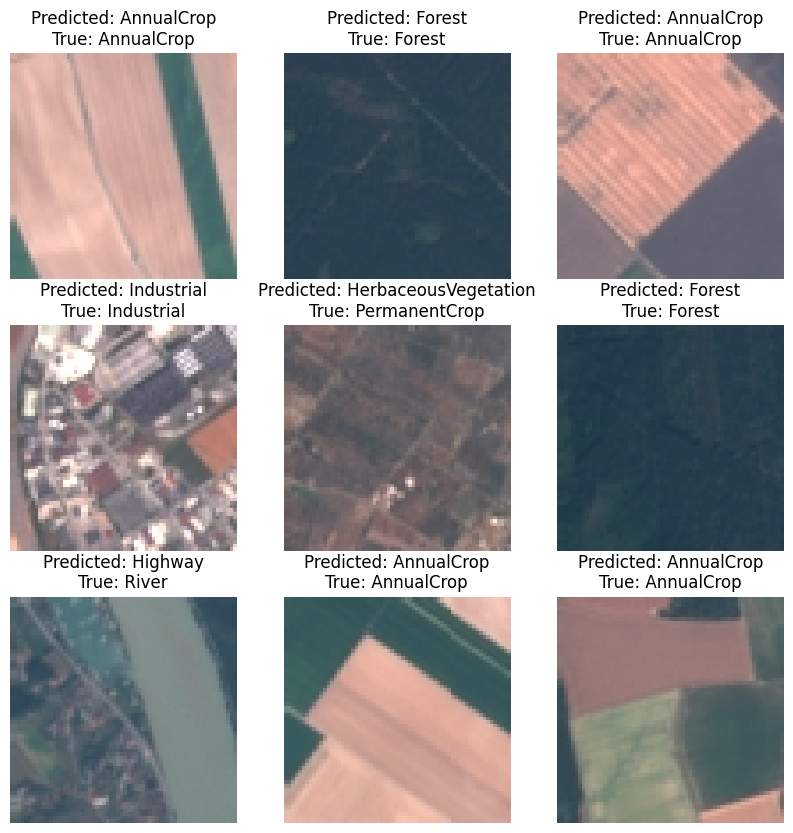

In [8]:

import matplotlib.pyplot as plt
import numpy as np

# Get a batch of test images and labels
test_images, test_labels = next(test_generator)

# Make predictions
predictions = model.predict(test_images)

# Get class indices
class_indices = test_generator.class_indices

# Display some images with predictions
plt.figure(figsize=(10, 10))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  plt.imshow(test_images[i])
  predicted_class = np.argmax(predictions[i])
  true_class = np.argmax(test_labels[i])
  plt.title(f"Predicted: {list(class_indices.keys())[list(class_indices.values()).index(predicted_class)]}\nTrue: {list(class_indices.keys())[list(class_indices.values()).index(true_class)]}")
  plt.axis('off')
plt.show()


169/169 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step


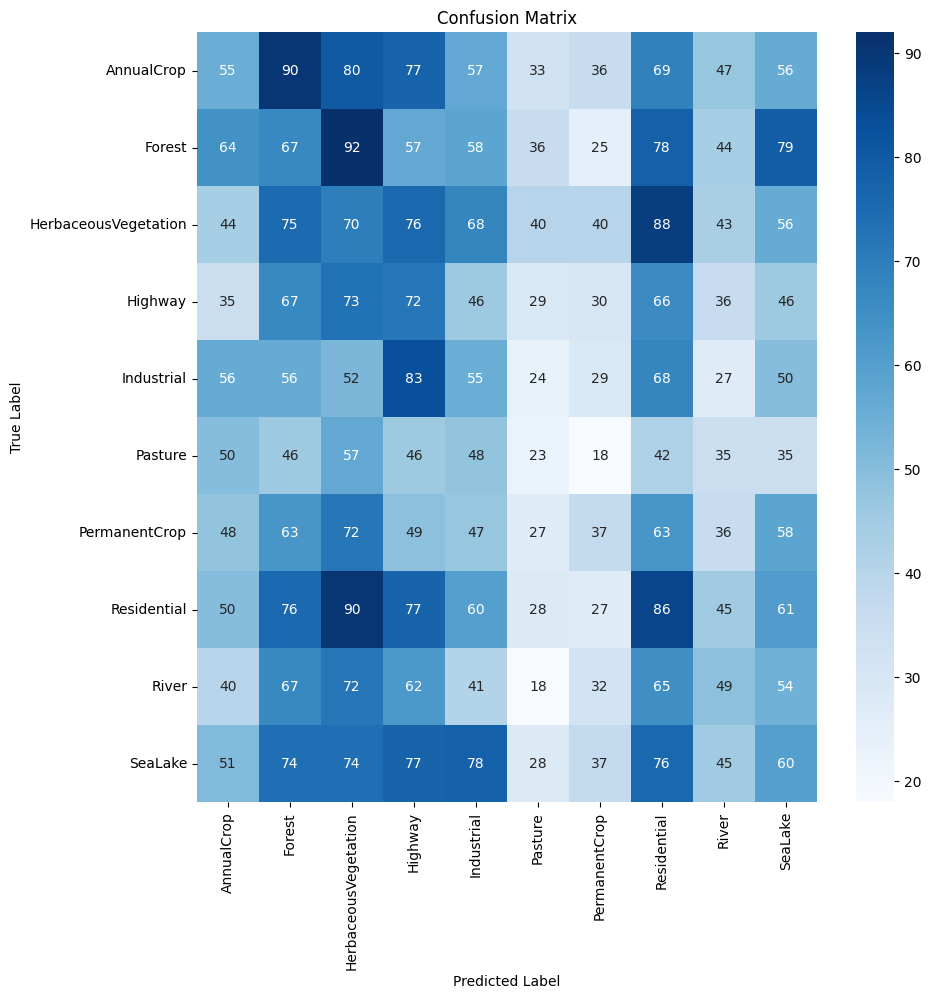

In [9]:
import seaborn as sns

# Get true labels for the entire test set
y_true = test_generator.classes

# Predict labels for the entire test set
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

# Generate confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_indices.keys(), yticklabels=class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


**Tensorflow:**

We have used tensorflow for our model due to its advantages over pytorch such as
*  ImageDataGenerator: TensorFlow’s ImageDataGenerator allowed you to easily perform real-time data augmentation (like rescaling, shearing, zooming, and flipping) and manage training, validation, and testing splits. This seamless integration with the training pipeline simplifies data handling, which might require more manual setup in PyTorch.
*  Built-in Validation Split: The validation_split parameter in ImageDataGenerator enabled you to easily split your training data into training and validation sets without additional code.
* Quick Prototyping: With Keras, you can quickly prototype models, thanks to its concise and user-friendly syntax. This is particularly useful when iterating on the model architecture or hyperparameters.

**Summary:**

Confusion Matrix:
The confusion matrix compares different classes (such as AnnualCrop, Forest, etc.) on both axes. The rows represent the actual classes, and the columns represent the predicted classes.
The values in each cell indicate the number of times instances of one class were predicted as another class.
Darker cells represent higher values, showing where the model performs better or worse. For instance, the model performs well in predicting classes like Industrial (83), Residential (86), and Forest (92).
Misclassifications can be observed where the model predicts classes incorrectly, such as predicting AnnualCrop as Forest or Herbaceous Vegetation, which is evident from the values off the diagonal.
Model Performance Summary:
Model Architecture:

The model is a Sequential Convolutional Neural Network (CNN).
It has two convolutional layers followed by max-pooling layers, flattening, and two dense layers.
The first convolutional layer has 32 filters, and the second one has 64 filters.
The final dense layer outputs 10 classes.
Training and Validation Performance:

The model was trained for 10 epochs.
Training accuracy started at 37.78% and improved to 82.96% by the final epoch.
Validation accuracy started at 62.08% and reached 82.59% by the final epoch.
The loss function shows a consistent decrease, which is a positive sign of learning.
Test Performance:

The test accuracy achieved was 79.93%, indicating that the model generalizes relatively well to unseen data.
Layer Summary:

The total number of trainable parameters is 1,626,442, indicating a moderately complex model.
Non-trainable parameters are 0, suggesting all layers are being updated during training.
Insights:
The model is performing well but has room for improvement, especially in areas where misclassifications are prominent.
The high number of parameters in the dense layers indicates that feature extraction is happening effectively, but further tuning might help reduce overfitting, as indicated by the difference between training and validation accuracy.
The test accuracy is slightly lower than the training accuracy, which could be due to overfitting or data differences between training and test sets.